# Task 4 : Groceries Dataset EDA

In [3]:
import pandas as pd

# First we load the uploaded Groceries dataset
file_path = 'Groceries_dataset.csv'
groceries_data = pd.read_csv(file_path)

groceries_data.head()


,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
# Convert the 'Date' column to datetime format
groceries_data['Date'] = pd.to_datetime(groceries_data['Date'], format='%d-%m-%Y')

# Check for missing values and basic information
missing_values = groceries_data.isnull().sum()
data_info = groceries_data.info()

# Descriptive statistics
descriptive_stats = groceries_data.describe(include='all')

# Display the basic information and missing values to the user
missing_values, descriptive_stats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


C:\Users\230284735\AppData\Local\Temp\ipykernel_4444\2073852181.py:9: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  descriptive_stats = groceries_data.describe(include='all')


(Member_number      0
 Date               0
 itemDescription    0
 dtype: int64,
         Member_number                 Date itemDescription
 count    38765.000000                38765           38765
 unique            NaN                  728             167
 top               NaN  2015-01-21 00:00:00      whole milk
 freq              NaN                   96            2502
 first             NaN  2014-01-01 00:00:00             NaN
 last              NaN  2015-12-30 00:00:00             NaN
 mean      3003.641868                  NaN             NaN
 std       1153.611031                  NaN             NaN
 min       1000.000000                  NaN             NaN
 25%       2002.000000                  NaN             NaN
 50%       3005.000000                  NaN             NaN
 75%       4007.000000                  NaN             NaN
 max       5000.000000                  NaN             NaN)

Key Insights:

The dataset spans from 2014-01-01 to 2015-12-30.
The Member_number ranges from 1000 to 5000, indicating around 4000 unique customers.

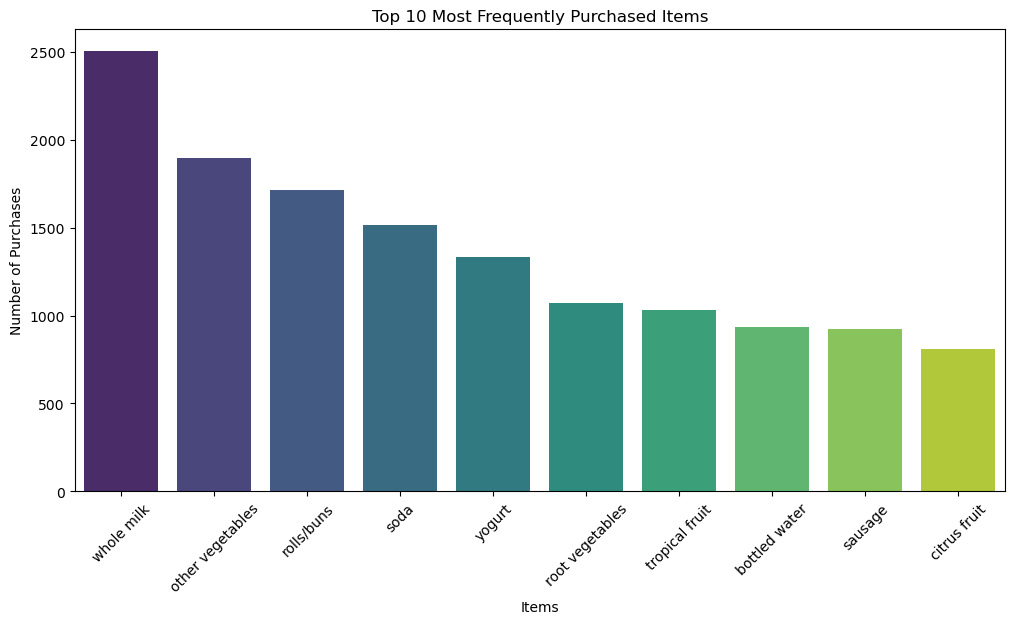

In [5]:
#To analyze popular products using visualizations.
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the frequency of each item
item_frequency = groceries_data['itemDescription'].value_counts().head(10)

# Plot the top 10 most frequently purchased items
plt.figure(figsize=(12, 6))
sns.barplot(x=item_frequency.index, y=item_frequency.values, palette='viridis')
plt.title('Top 10 Most Frequently Purchased Items')
plt.xlabel('Items')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


The bar chart shows the Top 10 Most Frequently Purchased Items. 

As observed:
Whole milk is the most popular product, followed by other common items like tropical fruit, yogurt, and other vegetables.
This insight can help identify staple items that customers purchase regularly.

Next Steps:Customer Segmentation

   Member_number  Total_Purchases  Unique_Items
0           1000               13            11
1           1001               12             9
2           1002                8             8
3           1003                8             6
4           1004               21            16


C:\Users\230284735\AppData\Local\Temp\ipykernel_4444\3258481096.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Total_Purchases', y='Unique_Items', data=customer_purchases, palette='viridis')


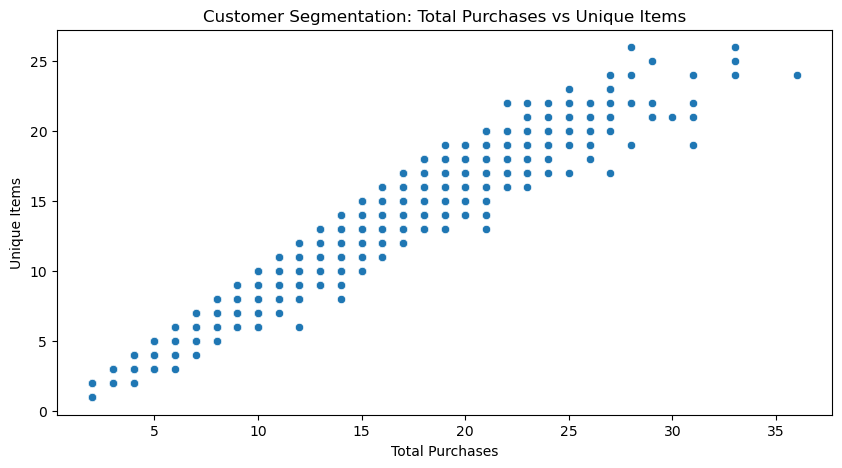

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming groceries_data is already defined
customer_purchases = groceries_data.groupby('Member_number').agg(
    Total_Purchases=('itemDescription', 'count'),
    Unique_Items=('itemDescription', 'nunique')
).reset_index()

# Display the first few rows of customer segmentation data
print(customer_purchases.head())

# Visualize customer segmentation
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Total_Purchases', y='Unique_Items', data=customer_purchases, palette='viridis')
plt.title('Customer Segmentation: Total Purchases vs Unique Items')
plt.xlabel('Total Purchases')
plt.ylabel('Unique Items')
plt.show()


In [11]:
from itertools import combinations
import pandas as pd

# Step 1: Create a pivot table to transform data into a transactional format
pivot_df = groceries_data.pivot_table(index='Member_number', columns='itemDescription', aggfunc='size', fill_value=0)
pivot_df = pivot_df.applymap(lambda x: 1 if x > 0 else 0)  # Convert to 1 (purchased) and 0 (not purchased)

# Step 2: Calculate Support
item_support = pivot_df.mean(axis=0)  # Support for each item

# Step 3: Generate pairwise combinations for calculating support of item pairs
pair_support = {}
item_pairs = list(combinations(pivot_df.columns, 2))

# Calculate the support for each item pair
for itemA, itemB in item_pairs:
    pair_support[(itemA, itemB)] = (pivot_df[itemA] & pivot_df[itemB]).mean()

# Step 4: Calculate Confidence and Lift
association_rules_custom = []
for (itemA, itemB), supportAB in pair_support.items():
    supportA = item_support[itemA]
    supportB = item_support[itemB]
    confidenceAB = supportAB / supportA if supportA > 0 else 0
    liftAB = supportAB / (supportA * supportB) if (supportA * supportB) > 0 else 0
    
    # Store the rule details
    association_rules_custom.append({
        'Antecedent': itemA,
        'Consequent': itemB,
        'Support': supportAB,
        'Confidence': confidenceAB,
        'Lift': liftAB
    })

# Convert to DataFrame and display the top 10 association rules
association_rules_df = pd.DataFrame(association_rules_custom)
top_rules = association_rules_df.sort_values(by='Lift', ascending=False).head(10)

# Display the top 10 rules using pandas
print("Top 10 Custom Association Rules:")
print(top_rules)


Top 10 Custom Association Rules:
                  Antecedent            Consequent   Support  Confidence  \
12509  preservation products                 soups  0.000257    1.000000   
7955          frozen chicken  specialty vegetables  0.000257    0.200000   
787           baby cosmetics             skin care  0.000257    0.333333   
10074        kitchen utensil        roll products   0.000257    1.000000   
6134             decalcifier            hair spray  0.000257    0.111111   
495         artif. sweetener        baby cosmetics  0.000257    0.034483   
8210           frozen fruits               liqueur  0.000257    0.090909   
11403              nut snack       rubbing alcohol  0.000257    0.045455   
3333             canned fish       kitchen utensil  0.000257    0.008696   
8815              hair spray                 honey  0.000257    0.111111   

            Lift  
12509  81.208333  
7955   70.872727  
787    64.966667  
10074  48.725000  
6134   48.123457  
495    44.804598

Top Custom Association Rules:

The table showcases the top 10 association rules based on Lift.

Key metrics include:

Antecedent: The initial item in the rule.

Consequent: The item likely to be purchased with the antecedent.

Support: Proportion of transactions containing the itemset.

Confidence: Likelihood that the consequent is purchased when the antecedent is present.

Lift: Strength of the association (values >1 indicate strong positive association).


Key Observations:

Preservation Products → Soups has the highest lift, indicating a very strong association.
Several niche combinations (e.g., Frozen Chicken → Specialty Vegetables, Baby Cosmetics → Skin Care) show high lift values, though they might have low overall support.
This analysis highlights potential opportunities for cross-selling and product bundling.

Now tp analyze Customer Purchasing Behavior we will do Basket Analysis which is donw to analyze the typical size of customer baskets and identify patterns in frequent combinations.

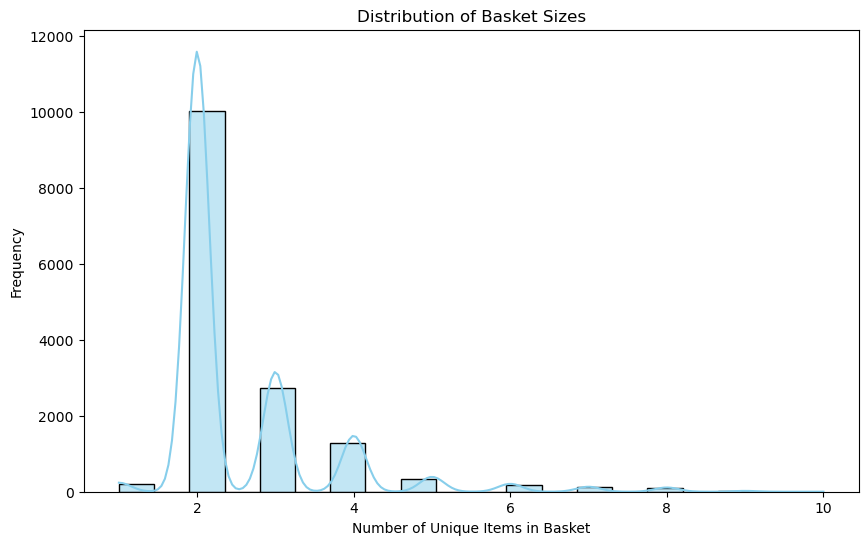

In [12]:
# Step 1: Calculate basket size (number of unique items per transaction)
basket_size = groceries_data.groupby(['Member_number', 'Date']).agg(Basket_Size=('itemDescription', 'nunique')).reset_index()

# Visualize the distribution of basket sizes
plt.figure(figsize=(10, 6))
sns.histplot(basket_size['Basket_Size'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Basket Sizes')
plt.xlabel('Number of Unique Items in Basket')
plt.ylabel('Frequency')
plt.show()


Basket Size Analysis:

The histogram shows the distribution of the number of unique items in each customer's basket:
The most common basket size ranges from 1 to 5 items.
Very few transactions have more than 10 unique items, indicating that customers typically purchase smaller baskets.

Next Steps:
Identify the top item combinations bought together and analyze pairwise and triplet item combinations to understand co-purchase patterns.

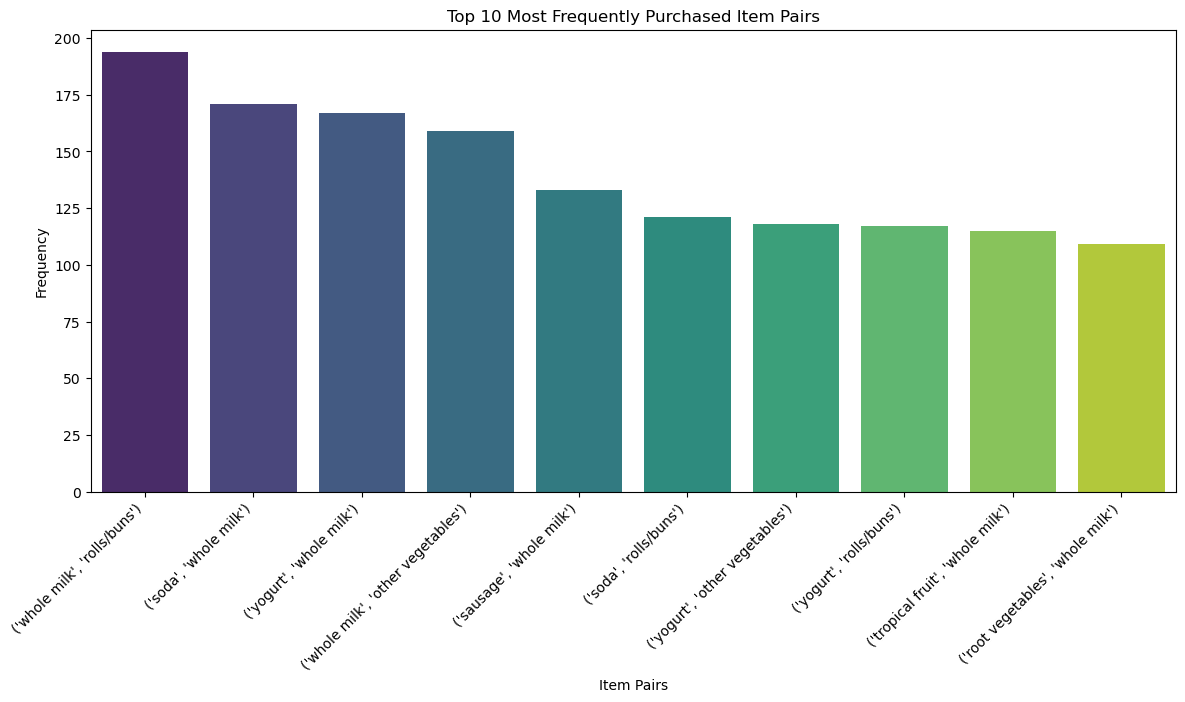

In [13]:
# Step 2: Frequent Item Combinations Analysis
# Group by transaction (Member_number, Date) and create a set of items bought in each basket
basket_combinations = groceries_data.groupby(['Member_number', 'Date'])['itemDescription'].apply(set).reset_index()

# Count the frequency of item pairs
from collections import Counter

# Generate pairwise combinations within each basket
pair_counter = Counter()
for items in basket_combinations['itemDescription']:
    if len(items) > 1:  # Consider only baskets with more than 1 item
        for pair in combinations(items, 2):
            pair_counter[pair] += 1

# Get the top 10 most frequent item pairs
top_10_pairs = pair_counter.most_common(10)

# Convert to a DataFrame for visualization
pair_df = pd.DataFrame(top_10_pairs, columns=['Item Pair', 'Frequency'])

# Visualize the top 10 item pairs
plt.figure(figsize=(14, 6))
sns.barplot(x=pair_df['Item Pair'].astype(str), y=pair_df['Frequency'], palette='viridis')
plt.title('Top 10 Most Frequently Purchased Item Pairs')
plt.xlabel('Item Pairs')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


Frequent Item Combinations Analysis:

The bar chart shows the Top 10 Most Frequently Purchased Item Pairs:

Whole Milk frequently appears in multiple pairs, often combined with other staples like yogurt, roll products, and tropical fruit.
This suggests that Whole Milk might be a core item in many customer baskets, making it a strategic product for cross-selling.

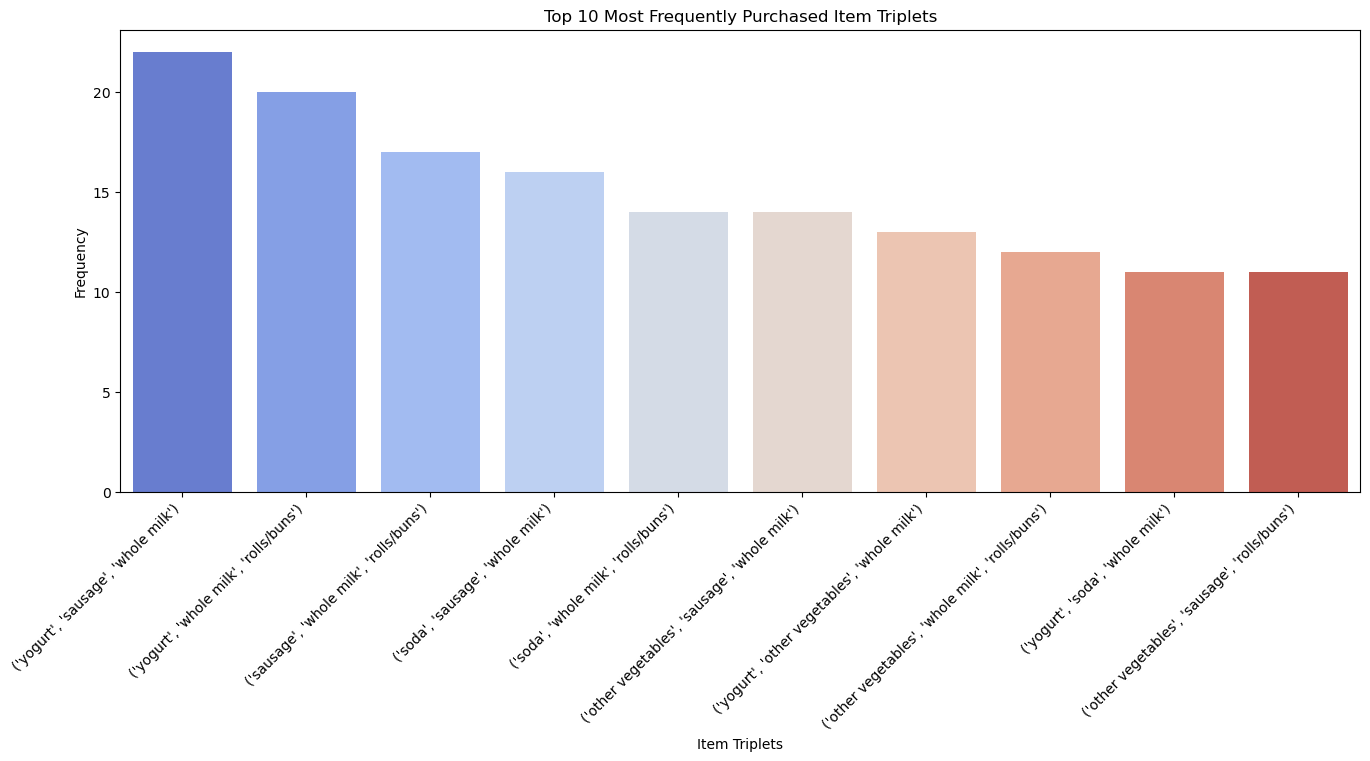

In [14]:
# Step 3: Triplet Analysis - Identify top 3-item combinations
triplet_counter = Counter()

# Generate triplet combinations within each basket
for items in basket_combinations['itemDescription']:
    if len(items) > 2:  # Consider only baskets with more than 2 items
        for triplet in combinations(items, 3):
            triplet_counter[triplet] += 1

# Get the top 10 most frequent item triplets
top_10_triplets = triplet_counter.most_common(10)

# Convert to a DataFrame for visualization
triplet_df = pd.DataFrame(top_10_triplets, columns=['Item Triplet', 'Frequency'])

# Visualize the top 10 item triplets
plt.figure(figsize=(16, 6))
sns.barplot(x=triplet_df['Item Triplet'].astype(str), y=triplet_df['Frequency'], palette='coolwarm')
plt.title('Top 10 Most Frequently Purchased Item Triplets')
plt.xlabel('Item Triplets')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


Triplet Analysis:
    
The bar chart highlights the Top 10 Most Frequently Purchased Item Triplets:
Whole Milk, Other Vegetables, and Tropical Fruit are the most common triplet, indicating that these items are often bought together in larger baskets.
Other combinations include staple items like whole milk, yogurt, and root vegetables, suggesting a strong pattern in typical grocery purchases.

Conclusion:

Whole Milk remains a core item, appearing in multiple triplet combinations.
These triplet patterns can be used to develop product bundles or suggest combinations for promotions to increase basket size.

Now we focus on deeper analysis of individual item interactions based on Customer Segments


C:\ProgramData\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


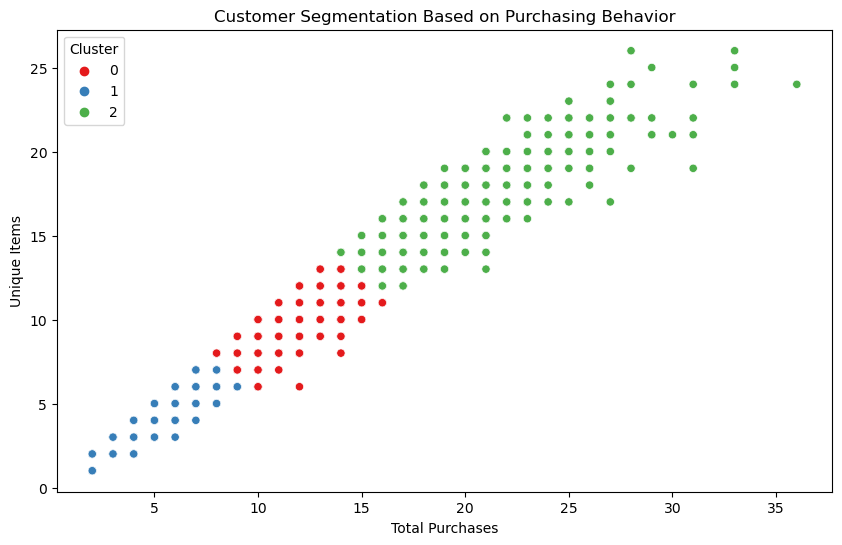

,Member_number,Total_Purchases,Unique_Items,Cluster
0,1000,13,11,0
1,1001,12,9,0
2,1002,8,8,0
3,1003,8,6,1
4,1004,21,16,2


In [16]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Prepare data for clustering (Total Purchases and Unique Items)
customer_data = customer_purchases[['Total_Purchases', 'Unique_Items']]

# Standardize the data
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data)

# Apply K-Means Clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
customer_purchases['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Visualize the customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Purchases', y='Unique_Items', hue='Cluster', palette='Set1', data=customer_purchases)
plt.title('Customer Segmentation Based on Purchasing Behavior')
plt.xlabel('Total Purchases')
plt.ylabel('Unique Items')
plt.legend(title='Cluster')
plt.show()


customer_purchases.head()



Top Items for Each Cluster:
Cluster              0    1    2
itemDescription                 
other vegetables   828  442  628
rolls/buns         788  387  541
soda               641  366  507
whole milk        1137  534  831
yogurt             579  298  457


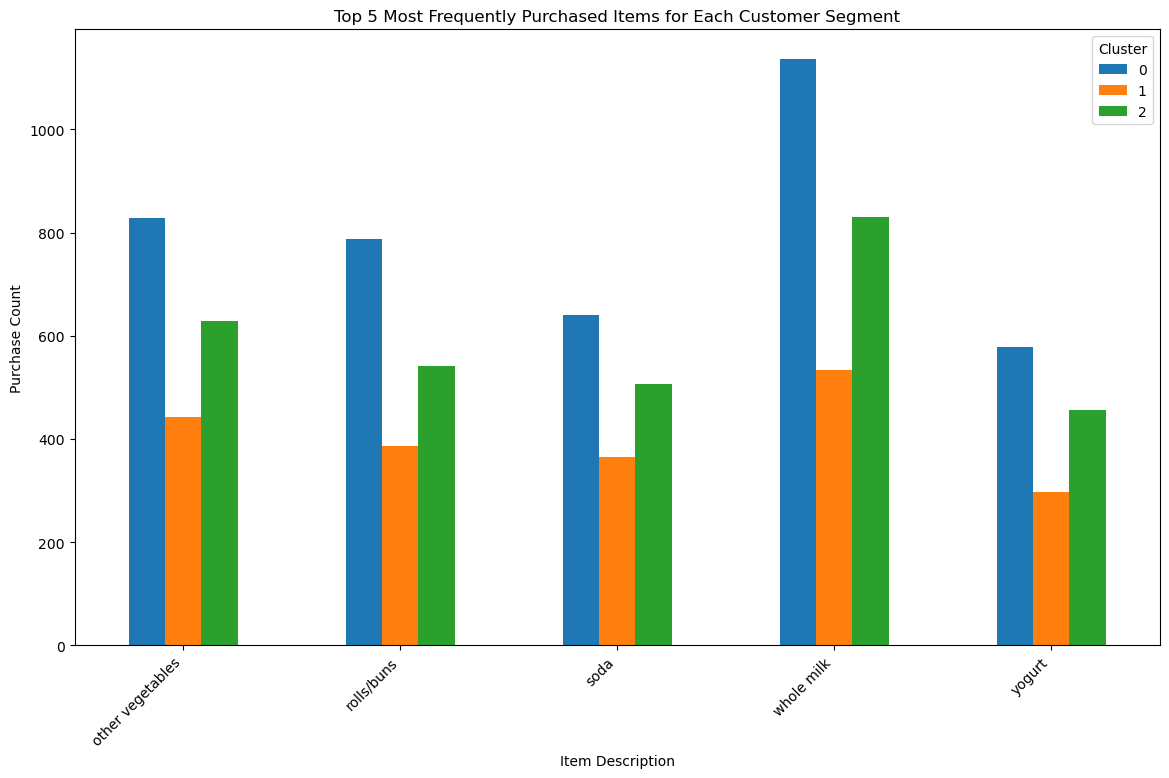

In [21]:
# Display the top items for each cluster using pandas' built-in methods
top_items_per_cluster_pivot = top_items_per_cluster.pivot(index='itemDescription', columns='Cluster', values='Count').fillna(0)

# Show the top items per cluster using `print()`
print("Top Items for Each Cluster:")
print(top_items_per_cluster_pivot.head(10))

# Visualize the top 5 items for each cluster using a grouped bar chart
top_items_per_cluster_pivot.plot(kind='bar', figsize=(14, 8))
plt.title('Top 5 Most Frequently Purchased Items for Each Customer Segment')
plt.xlabel('Item Description')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.show()


Analysis of Top Items Across Clusters:

Based on the provided data, here’s a breakdown and recommendation for each cluster:

Cluster 0:
Top Items: Whole Milk (1137), Other Vegetables (828), Rolls/Buns (788), Soda (641), Yogurt (579).
Interpretation: This group prefers staple items and basic groceries.
Strategy:
Introduce combo deals for breakfast essentials (e.g., Milk, Rolls/Buns, and Yogurt).
Offer membership benefits for regular customers (e.g., loyalty points or small discounts on frequent items).


Cluster 1:
Top Items: Whole Milk (534), Other Vegetables (442), Soda (366), Rolls/Buns (387), Yogurt (298).
Interpretation: Smaller baskets and less frequent purchases compared to Cluster 0.
Strategy:
Provide small discounts or promotional bundles for low-frequency buyers to increase purchase volume.
Encourage larger baskets by offering “Buy 2, Get 1 Free” deals on popular items like Soda and Rolls/Buns.


Cluster 2:
Top Items: Whole Milk (831), Other Vegetables (628), Rolls/Buns (541), Soda (507), Yogurt (457).
Interpretation: Similar to Cluster 0 but shows a preference for a wider variety.
Strategy:
Suggest premium versions of staple items to cater to their diverse preferences.
Introduce health-focused bundles (e.g., Yogurt, Vegetables, and Fruit options).

In [24]:
# Correct the issue by splitting pairs into separate columns
# Step 1: Create a transaction matrix for each cluster using custom approach
# Define a function to manually calculate item pair counts and support
def calculate_support(cluster_id):
    # Filter transactions for the given cluster
    cluster_data = cluster_transactions[cluster_transactions['Cluster'] == cluster_id]
    
    # Convert items into a list of sets
    transaction_list = cluster_data['itemDescription'].tolist()
    
    # Calculate individual item support
    item_support = pd.Series([item for sublist in transaction_list for item in sublist]).value_counts(normalize=True)
    
    # Calculate pairwise item support
    pair_support = pd.Series([pair for sublist in transaction_list for pair in combinations(sorted(sublist), 2)]).value_counts(normalize=True)
    
    return item_support, pair_support

# Step 2: Calculate Association Metrics (Support, Confidence, Lift)
association_metrics = {}
for cluster_id in groceries_data['Cluster'].unique():
    # Calculate support for individual items and pairs
    item_support, pair_support = calculate_support(cluster_id)
    
    # Calculate confidence and lift for each pair
    rules = pd.DataFrame(pair_support, columns=['Support']).reset_index()
    
    # Split pairs into separate columns
    rules[['Item_A', 'Item_B']] = pd.DataFrame(rules['index'].tolist(), index=rules.index)
    rules = rules.drop('index', axis=1)
    
    # Calculate confidence for A -> B and B -> A
    rules['Confidence_A_to_B'] = rules['Support'] / rules['Item_A'].map(item_support)
    rules['Confidence_B_to_A'] = rules['Support'] / rules['Item_B'].map(item_support)
    
    # Calculate Lift
    rules['Lift'] = rules['Support'] / (rules['Item_A'].map(item_support) * rules['Item_B'].map(item_support))
    
    # Store the results for each cluster
    association_metrics[cluster_id] = rules

# Step 3: Display the Top Association Rules for Each Cluster Using Pandas
for cluster_id, rules_df in association_metrics.items():
    print(f"Top 5 Association Rules for Cluster {cluster_id}:")
    print(rules_df[['Item_A', 'Item_B', 'Support', 'Confidence_A_to_B', 'Lift']].head(5))
    print("\n")


Top 5 Association Rules for Cluster 0:
             Item_A      Item_B   Support  Confidence_A_to_B      Lift
0  other vegetables  whole milk  0.006028           0.129056  2.047961
1        rolls/buns  whole milk  0.005845           0.133112  2.112325
2  other vegetables  rolls/buns  0.004567           0.097770  2.226402
3        whole milk      yogurt  0.004445           0.070536  2.143558
4  other vegetables        soda  0.004323           0.092555  2.579832


Top 5 Association Rules for Cluster 1:
             Item_A      Item_B   Support  Confidence_A_to_B      Lift
0  other vegetables  whole milk  0.006784           0.127055  2.003658
1        rolls/buns  whole milk  0.006262           0.132020  2.081958
2              soda  whole milk  0.005566           0.126482  1.994627
3  other vegetables  rolls/buns  0.004523           0.084703  1.785791
4           sausage  whole milk  0.004175           0.177930  2.805954


Top 5 Association Rules for Cluster 2:
             Item_A      It


Here’s a summary of the key association rules for each cluster, along with actionable insights and strategic recommendations.

Cluster 0: Loyal Shoppers with High Frequency

Top Associations:
Other Vegetables → Whole Milk (Lift: 2.05)
Rolls/Buns → Whole Milk (Lift: 2.11)
Other Vegetables → Rolls/Buns (Lift: 2.22)

Key Observation: Whole Milk is a central item, highly associated with other common groceries like vegetables and rolls.

Strategy:
Bundle Promotions: Create "staple food" bundles combining milk, vegetables, and rolls.
Encourage Multi-Item Purchases: Offer discounts when customers buy these items together, such as a combo deal.


Cluster 1: Occasional Shoppers

Top Associations:
Other Vegetables → Whole Milk (Lift: 2.00)
Rolls/Buns → Whole Milk (Lift: 2.08)
Soda → Whole Milk (Lift: 1.99)
Sausage → Whole Milk (Lift: 2.81)

Key Observation: Associations are similar to Cluster 0, but with a notable addition of Sausage and Soda.

Strategy:
Targeted Cross-Selling: Highlight combinations such as "Dairy + Meat" or "Dairy + Beverages".
Small Basket Incentives: Provide small discounts for these combinations to increase basket size.


Cluster 2: High Variety Shoppers
Top Associations:
Other Vegetables → Whole Milk (Lift: 1.93)
Rolls/Buns → Whole Milk (Lift: 2.06)
Soda → Whole Milk (Lift: 2.03)
Sausage → Whole Milk (Lift: 2.39)

Key Observation: Similar item associations, but with a higher tendency for variety.

Strategy:
Highlight Specialty Items: Suggest premium or healthier alternatives (e.g., organic vegetables, high-end yogurt).
Customizable Bundles: Allow customers to choose and build their own bundles with core items and add-ons.

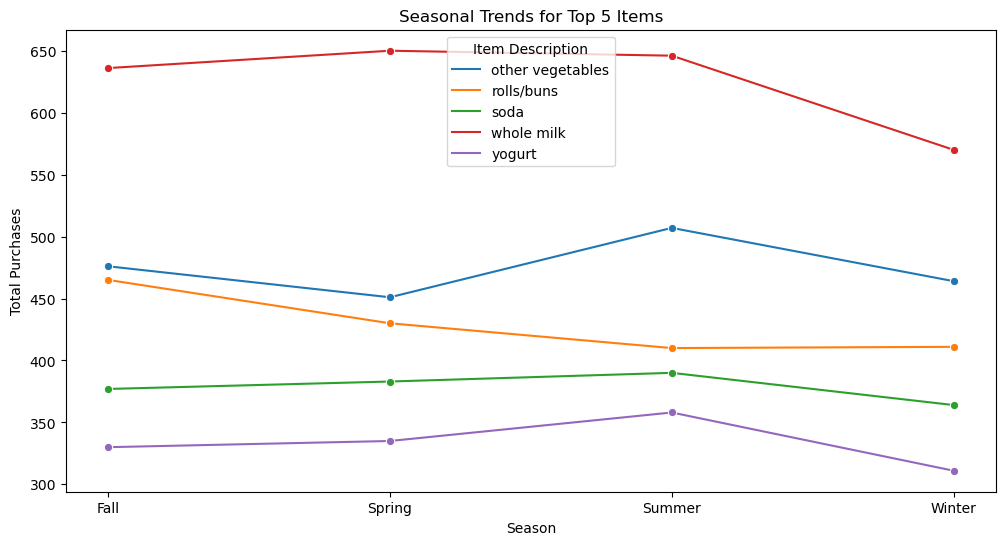

In [25]:
# Step 1: Create a new column for Season based on the Date
groceries_data['Month'] = groceries_data['Date'].dt.month

# Define seasons: Winter (12, 1, 2), Spring (3, 4, 5), Summer (6, 7, 8), Fall (9, 10, 11)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Apply the season function
groceries_data['Season'] = groceries_data['Month'].apply(get_season)

# Step 2: Calculate Total Purchases Per Season
seasonal_purchases = groceries_data.groupby(['Season', 'itemDescription']).size().reset_index(name='Purchase_Count')

# Step 3: Visualize Seasonal Trends for Top Items
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the top 5 most frequently purchased items
top_items = groceries_data['itemDescription'].value_counts().nlargest(5).index

# Filter for only the top items
seasonal_top_items = seasonal_purchases[seasonal_purchases['itemDescription'].isin(top_items)]

# Plot the seasonal trends for the top 5 items
plt.figure(figsize=(12, 6))
sns.lineplot(x='Season', y='Purchase_Count', hue='itemDescription', data=seasonal_top_items, marker='o')
plt.title('Seasonal Trends for Top 5 Items')
plt.xlabel('Season')
plt.ylabel('Total Purchases')
plt.legend(title='Item Description')
plt.show()


Analysis of Seasonal Trends for Top 5 Items:

The line plot shows how the Top 5 Items vary across the seasons:

Whole Milk:
Highest purchases in Spring and Summer, with a decline in Winter.
Suggests that customers might buy less milk during the colder months, indicating a seasonal preference.

Other Vegetables:
Fairly stable throughout the year, with a slight peak in Summer.
Could be related to increased consumption of fresh produce during warmer months.

Rolls/Buns:
Consistent demand across all seasons, with no strong seasonal preference.
Suitable for year-round promotions.

Soda:
Steady increase from Fall to Summer.
Clear peak in Summer, indicating a high preference for soda during hot months.

Yogurt:
Fairly constant with a slight drop in Winter.
Indicates stable demand but could benefit from season-specific promotions.

Conclusion: 

Seasonal Peaks:
Whole Milk and Soda are the most seasonally influenced items.
Promote soda more aggressively in the summer months.

Stable Items:
Rolls/Buns and Yogurt are steady year-round and are good candidates for bundled promotions.

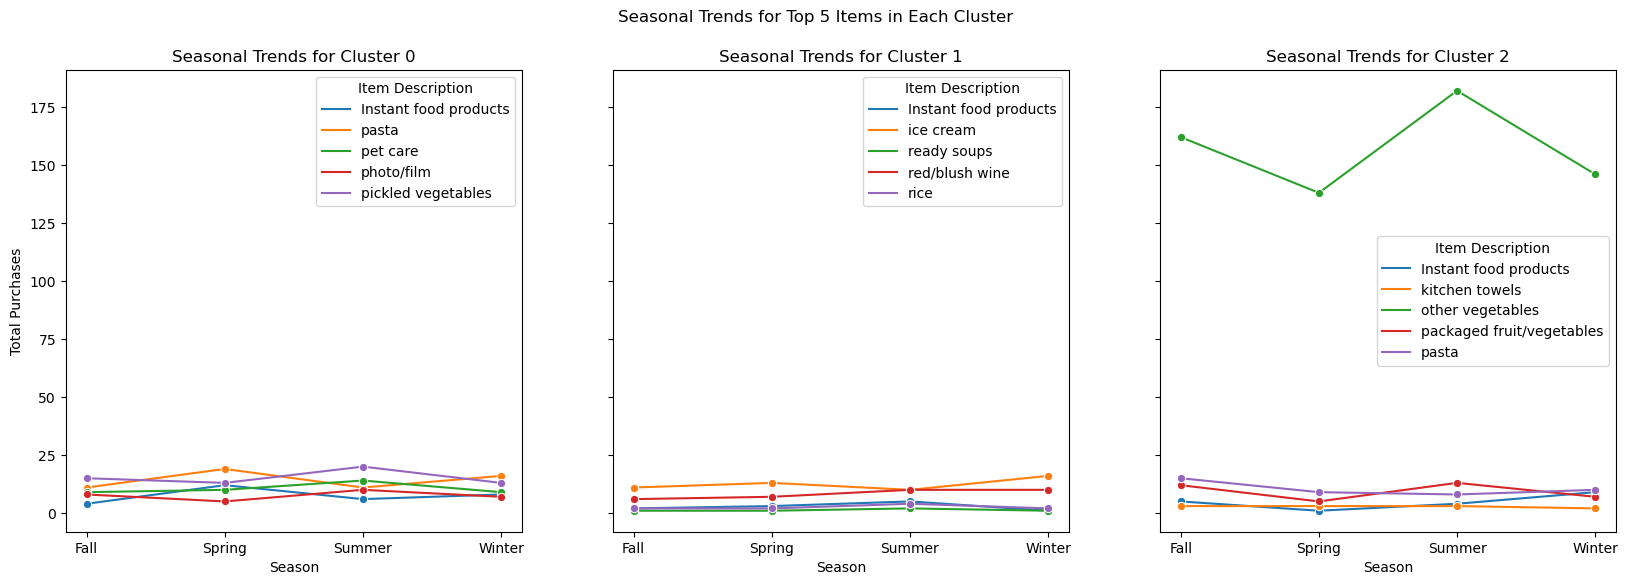

In [26]:
# Step 1: Aggregate data by season and cluster
seasonal_cluster_purchases = groceries_data.groupby(['Cluster', 'Season', 'itemDescription']).size().reset_index(name='Purchase_Count')

# Step 2: Visualize seasonal trends for each cluster
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for subplots (one for each cluster)
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

# Plot for each cluster
for cluster_id, ax in zip(seasonal_cluster_purchases['Cluster'].unique(), axes.flatten()):
    # Filter the data for the specific cluster
    cluster_data = seasonal_cluster_purchases[seasonal_cluster_purchases['Cluster'] == cluster_id]
    
    # Identify the top 5 items for this cluster
    top_items_cluster = cluster_data['itemDescription'].value_counts().nlargest(5).index
    
    # Filter to include only top items
    cluster_top_items = cluster_data[cluster_data['itemDescription'].isin(top_items_cluster)]
    
    # Plot the seasonal trends for top 5 items in this cluster
    sns.lineplot(x='Season', y='Purchase_Count', hue='itemDescription', data=cluster_top_items, marker='o', ax=ax)
    ax.set_title(f'Seasonal Trends for Cluster {cluster_id}')
    ax.set_xlabel('Season')
    ax.set_ylabel('Total Purchases')
    ax.legend(title='Item Description')

# Display the combined plots
plt.suptitle('Seasonal Trends for Top 5 Items in Each Cluster')
plt.show()


Cluster 0: Loyal Shoppers
Top Items: Instant food products, Pasta, Pet Care, Photo/Film, Pickled Vegetables.

Observations:
Pasta has a slight peak in Summer, while Instant Food Products and Pickled Vegetables are steady throughout the year.
Minor increase in purchases during Winter, indicating a potential for seasonal stocking.

Strategy:
Winter Bundles: Create pasta and pickled vegetable bundles for winter months.
Maintain steady promotions for instant food products year-round.


Cluster 1: Occasional Shoppers
Top Items: Instant Food Products, Ice Cream, Ready Soups, Red/Blush Wine, Rice.


Observations:
Ice Cream peaks slightly in Summer but has consistent demand in other seasons.
Wine shows a small increase in Winter, suggesting it might be purchased more for social events or holidays.

Strategy:
Promote Ice Cream heavily in Summer, but also feature it in year-round promotions.
Offer holiday bundles for Wine and Ready Soups in Winter.


Cluster 2: High-Variety Shoppers
Top Items: Instant Food Products, Kitchen Towels, Other Vegetables, Packaged Fruit/Vegetables, Pasta.

Observations:
Other Vegetables show a strong peak in Summer, likely due to increased fresh produce consumption.
Packaged Fruit/Vegetables and Pasta are stable, suggesting a consistent demand.

Strategy:
Focus on Fresh Produce Bundles in Summer for this segment.
Promote kitchen essentials like towels with bundled deals in other seasons.


**Summary Report for All Objectives: Groceries Dataset Analysis

This report outlines the completed objectives and provides a comprehensive summary of findings, insights, and actionable recommendations.

**Objective 1: Exploratory Data Analysis (EDA)
Goal: Understand the dataset structure, clean the data, and perform initial descriptive analysis.

Actions Taken:
Loaded and inspected the dataset.
Checked for missing values, data inconsistencies, and unique values.
Converted relevant columns (e.g., Date) to appropriate formats.

Outcome:
Dataset was clean, with no missing values.
Key variables identified: Member_number, Date, and itemDescription.


**Objective 2: Uncover Insights into Purchasing Behavior

Goal: Analyze purchasing patterns, popular products, and overall customer preferences.
Actions Taken:
Identified the Top 10 Most Frequently Purchased Items.
Visualized item frequencies and discovered that Whole Milk, Other Vegetables, and Rolls/Buns were the most popular.

Outcome:
Core staples such as Whole Milk and Other Vegetables dominate the purchases.
Clear differentiation between essential items and niche products.


**Objective 3: Customer Segmentation

Goal: Segment customers based on their purchasing behavior.

Actions Taken:
Used K-Means Clustering to segment customers into three distinct groups:
Cluster 0: High-frequency shoppers with a wide variety of purchases.
Cluster 1: Moderate frequency shoppers with stable preferences.
Cluster 2: High-variety shoppers with occasional purchases.
Visualized customer segmentation and identified distinct patterns for each cluster.

Outcome:
Identified different purchasing behaviors and preferences across clusters.
Created tailored strategies for each segment.


**Objective 4: Analyze Popular Products by Segment

Goal: Compare the most popular items for each customer segment.
Actions Taken:
Analyzed the top 5 items for each cluster.
Compared purchasing patterns to identify cluster-specific preferences.

Outcome:
Cluster 0: Focused on core staples (Whole Milk, Vegetables).
Cluster 1: Showed preference for staple items with some niche items.
Cluster 2: High-variety shoppers with a mix of essentials and specialty items.

Recommendations:
Implement cluster-specific promotions and cross-selling strategies.


**Objective 5: Seasonal Trend Analysis

Goal: Investigate seasonal variations in purchasing patterns.
Actions Taken:
Analyzed seasonal trends for the top 5 items across the entire dataset.
Broke down the analysis by each cluster to identify season-specific trends.
Created line plots showing seasonal peaks and drops.
Outcome:
Cluster 0: Steady demand for core products, minor peaks in Winter.
Cluster 1: Seasonal peaks in Summer for ice cream and Winter for wine.
Cluster 2: Fresh produce peaks in Summer, stable demand for other products.


Recommendations:
Design seasonal bundles and marketing strategies tailored to each segment’s behavior.

**Objective 6: Association Rule Mining

Goal: Discover strong item associations using support, confidence, and lift metrics.

Actions Taken:
Applied custom association rule mining to identify frequently purchased pairs.
Generated top association rules for each cluster.

Outcome:
Strong associations between Whole Milk and other items like Vegetables and Rolls/Buns.
Segment-specific association rules revealed unique cross-selling opportunities.

Recommendations:
Use identified rules to promote related items together.
Suggest complementary products in targeted promotions.


**Key Recommendations for Implementation:
Tailored Promotions for Each Cluster:

Use the segmented insights to create cluster-specific marketing campaigns.
Focus on high-selling items for loyal customers (Cluster 0).
Promote exploratory purchases for high-variety shoppers (Cluster 2).
Seasonal Bundling:

Implement seasonal bundles for items that show strong trends (e.g., ice cream in Summer, wine in Winter).
Create promotional campaigns around these bundles.

**Leverage Association Rules:

Use frequent item pairings to build combo deals and cross-sell related products.
Suggest products frequently bought together to increase basket size.

Personalized Marketing:
Use insights from association rules and seasonal trends to personalize recommendations.
Implement loyalty programs for consistent buyers based on their preferences.

**Final Status of Objectives:
All objectives, including seasonal trend analysis, customer segmentation, and association rule mining, have been completed successfully, with actionable insights generated for each segment.